In [44]:
import pandas as pd
import jieba
import jieba.analyse
import numpy as np
from collections import Counter
import plotly.express as px
import networkx as nx
import codecs
import jieba.posseg as pseg
import matplotlib.pyplot as plt
import matplotlib

In [45]:
stopWords = []
with open('stopword.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [46]:
stoplst = [' ', '\xa0']
for words in stoplst:
    stopWords.append(words)

In [47]:
with open('user_dictionary.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)

In [48]:
data = pd.read_csv("reaction.csv",encoding = "Big5")
data["seg"] = ""
data["你覺得元宇宙是甚麼？"]


0                虛擬世界
1            線上三維虛擬遊戲
2          Meta(bruh)
3               另一個世界
4               就宇宙（？
           ...       
95    一個全新能夠展現自我的網路世界
96     人們想像與創創造力的匯聚中心
97               虛擬世界
98                不知道
99                不知道
Name: 你覺得元宇宙是甚麼？, Length: 100, dtype: object

In [49]:
# 建立字典
jieba.load_userdict('user_dictionary.txt')
jieba.analyse.set_stop_words('stopword.txt')
#抓出關鍵詞
n = 0
for documents in data["你覺得元宇宙是甚麼？"]:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    data['seg'].iloc[n] = seg_list
    n = n + 1

In [50]:
error_lst = []
terms=[]
for i in range(len(data["你覺得元宇宙是甚麼？"])):
    try:
        for j in list(jieba.cut(data["你覺得元宇宙是甚麼？"][i], cut_all = False)):
            if j not in stopWords:
                terms.append(j)
    except:
        error_lst.append([i, data["你覺得元宇宙是甚麼？"][i]])

In [51]:
names = {}          
relationships = {}  
lineNames = []  
for i in range(len(data["你覺得元宇宙是甚麼？"])):
    try:
        poss = jieba.cut(data["你覺得元宇宙是甚麼？"][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:    
                relationships[w] = {}            
    except:
        pass

In [52]:
term_dic = dict()
for sentence in lineNames:
    for term in sentence:
        if term not in term_dic:
            term_dic[term] = {}

In [53]:
for i in range(len(lineNames)):
    for term1 in term_dic:
        num = 0
        for term2 in lineNames[i]:
            if term1 == term2:
                num += 1
        term_dic[term1][data["你覺得元宇宙是甚麼？"][i]] = num

In [54]:
TDM = pd.DataFrame.from_dict(term_dic)
TDM

,虛擬世界,線上,三維,虛擬,遊戲,Meta,(,bruh,),另,...,使用者,不太清楚,體驗,自行,全新,人們,創創,造力,匯聚,中心
虛擬世界,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
線上三維虛擬遊戲,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Meta(bruh),0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
另一個世界,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
就宇宙（？,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
人創造的宇宙\n,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
自行想像,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
虛擬立體的世界,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一個全新能夠展現自我的網路世界,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
#算出關係矩陣
X = TDM.to_numpy()
out = X.transpose().dot(X)
out

array([[8, 0, 0, ..., 0, 0, 0],
       [0, 2, 2, ..., 0, 0, 0],
       [0, 2, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [56]:
#找出縱軸名稱
v= list(term_dic["虛擬世界"].keys())
#找出橫軸名稱
u = list(term_dic.keys())

In [57]:
type(out)

numpy.ndarray

In [58]:
data_df = pd.DataFrame(out)

In [59]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,10,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1


In [60]:
#換橫軸名稱
data_df.columns = u
#換縱軸名稱
data_df.index = u
#test
data_df

,虛擬世界,線上,三維,虛擬,遊戲,Meta,(,bruh,),另,...,使用者,不太清楚,體驗,自行,全新,人們,創創,造力,匯聚,中心
虛擬世界,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
線上,0,2,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
三維,0,2,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
虛擬,0,1,1,10,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
遊戲,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
人們,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
創創,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
造力,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
匯聚,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1


In [77]:
co_occur_by_records = []
for name1 in u:
    for name2 in u:
        Xdata = []
        if data_df[name1][name2] == 0:
            pass
        else:
            Xdata.append(name1)
            Xdata.append(name2)
            Xdata.append(data_df[name1][name2])
            # print(Xdata) 
            co_occur_by_records.append(Xdata)
            # print(co_occur_by_records)
    Xdata.clear()      
co_occur_by_records

AttributeError: 'tuple' object has no attribute 'append'

In [67]:
co_occur_by_records
type(co_occur_by_records)

list

In [68]:
!pip install networkx

{'虛擬世界': Text(0.022108491374089666, -0.08281178757508835, '虛擬世界'),
 '世界': Text(0.2448644908658056, -0.9171882124249113, '世界'),
 '3D': Text(-0.2669729822398952, 1.0, '3D')}

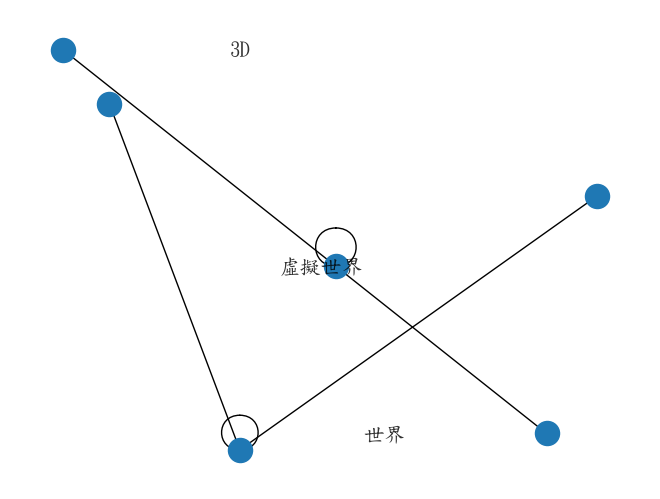

In [76]:
import networkx as nx
G=nx.Graph()
# G.add_edges_from([(1,2),(1,3)])

G.add_weighted_edges_from([('虛擬世界', '虛擬世界', 8),('虛擬世界', '世界', 2),('虛擬世界', '3D', 1)])
pos=nx.spring_layout(G)


import matplotlib.pyplot as plt
nx.draw(G)
nx.draw_spectral(G)
nx.draw_networkx_labels(G, pos, font_size = 15, font_family='sans-serif', alpha=0.8)


In [65]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['DFKai-SB']   
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每筆通聯紀錄為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
plt.show()

ValueError: not enough values to unpack (expected 3, got 0)

<Figure size 1500x1500 with 0 Axes>

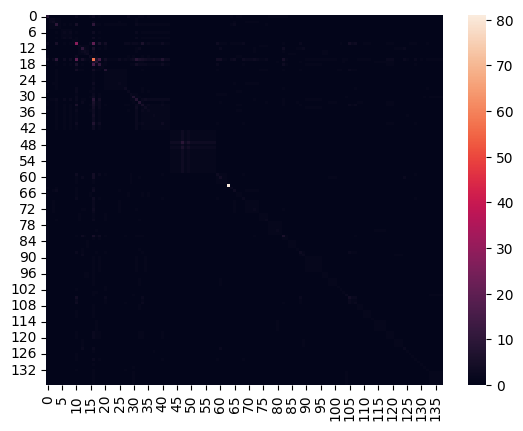

In [ ]:
import seaborn as sns
heat_map = sns.heatmap( out )

# 亂搞

In [ ]:
data["seg"]

0                       [虛擬世界]
1             [線上, 三維, 虛擬, 遊戲]
2                 [Meta, bruh]
3                         [世界]
4                         [宇宙]
                ...           
95                [網路, 全新, 世界]
96    [人們, 創創, 造力, 匯聚, 想像, 中心]
97                      [虛擬世界]
98                          []
99                          []
Name: seg, Length: 100, dtype: object

In [ ]:
#將所有關鍵字整理成一個列表
u = 0
words = []
for i in data['seg']:
    for word in data["seg"][u]:
        print(word)
        words.append(word)
    u = u + 1

虛擬世界
線上
三維
虛擬
遊戲
Meta
bruh
世界
宇宙
虛擬世界
3D
東西
創造
世界
創作
虛擬
連結
網路
社交
虛擬世界
真實
世界
創造
空間
想像
想像
虛擬世界
空間
虛擬
創造
構想
滿足
大眾
理想
存在
世界
可能
think
thing
help
human
imagine
new
world
modern
concepts
人類
世界
立體
虛擬世界
虛擬
現實
世界
3D
虛擬世界
真實
存在
世界
自由
世界
宇宙
虛擬
世界
二維
三維
連結
哲學
現實
虛擬世界
見面
交流
地方
將現實
虛擬世界
融入
生活
線上
三維
空間
世界
創造
出來
虛擬世界
ar
vr
宇宙
宇宙
虛擬
東西
電腦
電子
產品
創造
空間
創造
世界
東西
虛擬世界
美好世界
想像中
3D
想像
世界
虛擬世界
人類
意識
領域
延伸
創造
世界
虛擬世界
科技
虛擬
現實
虛擬
世界
豐富
世界
空間
宇宙
很酷
東西
想像
虛擬世界
重疊交錯
世界
創造
東西
蓋動物
基地
地球
路上
世界
虛擬世界
MINECRAFT
想像
網路
世界
東西
創造
東西
買賣
交易
世界
蓋建築
好玩
宇宙
人類
宇宙
打造
人類
宇宙
打造
人類
宇宙
打造
有無限
可能
虛擬世界
虛擬世界
夢想
世界
虛擬
地方
奇特
世界
東西
想像
世界
創造
使用者
自由
世界
不太清楚
宇宙
虛擬世界
虛擬世界
體驗
虛擬世界
創造
宇宙
想像
自行
虛擬
立體
世界
網路
全新
世界
人們
創創
造力
匯聚
想像
中心
虛擬世界


In [ ]:
# 數關鍵字出現的次數
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [ ]:
df = [show_key, show_values]
df

[       0
 0   虛擬世界
 1     線上
 2     三維
 3     虛擬
 4     遊戲
 ..   ...
 79    人們
 80    創創
 81    造力
 82    匯聚
 83    中心
 
 [84 rows x 1 columns],
      0
 0   20
 1    2
 2    3
 3   10
 4    1
 ..  ..
 79   1
 80   1
 81   1
 82   1
 83   1
 
 [84 rows x 1 columns]]

In [ ]:
result = pd.concat(df, axis=1)
result.columns = ['有提到的單詞', '次數']
result

,有提到的單詞,次數
0,虛擬世界,20
1,線上,2
2,三維,3
3,虛擬,10
4,遊戲,1
...,...,...
79,人們,1
80,創創,1
81,造力,1
82,匯聚,1
